In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

# Load Dataset
df = pd.read_csv('startup data.csv')

# Basic Info
print(df.head())
print(df.shape)
print(df.info())
print(df.isnull().sum())

# Drop unnecessary columns
df.drop(['id', 'Unnamed: 0', 'zip_code', 'name', 'object_id'], axis=1, inplace=True, errors='ignore')

# Handle missing values
df.fillna(df.median(numeric_only=True), inplace=True)

# Encode categorical columns
le = LabelEncoder()
cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols:
    df[col] = le.fit_transform(df[col].astype(str))

print("After Cleaning:")
print(df.head())

   Unnamed: 0 state_code   latitude   longitude zip_code       id  \
0        1005         CA  42.358880  -71.056820    92101   c:6669   
1         204         CA  37.238916 -121.973718    95032  c:16283   
2        1001         CA  32.901049 -117.192656    92121  c:65620   
3         738         CA  37.320309 -122.050040    95014  c:42668   
4        1002         CA  37.779281 -122.419236    94105  c:65806   

            city              Unnamed: 6               name  labels  ...  \
0      San Diego                     NaN        Bandsintown       1  ...   
1      Los Gatos                     NaN          TriCipher       1  ...   
2      San Diego      San Diego CA 92121              Plixi       1  ...   
3      Cupertino      Cupertino CA 95014  Solidcore Systems       1  ...   
4  San Francisco  San Francisco CA 94105     Inhale Digital       0  ...   

  object_id has_VC has_angel has_roundA  has_roundB  has_roundC  has_roundD  \
0    c:6669      0         1          0          

In [4]:
print(df.describe())
print("\nClass Distribution:")
print(df['status'].value_counts())

       state_code    latitude   longitude        city  Unnamed: 6      labels  \
count  923.000000  923.000000  923.000000  923.000000  923.000000  923.000000   
mean    10.319610   38.517442 -103.539212  125.405200  196.592633    0.646804   
std     10.705925    3.741497   22.394167   59.380428   76.255229    0.478222   
min      0.000000   25.752358 -122.756956    0.000000    0.000000    0.000000   
25%      2.000000   37.388869 -122.198732   77.500000  141.500000    0.000000   
50%      2.000000   37.779281 -118.374037  135.000000  252.000000    1.000000   
75%     23.000000   40.730646  -77.214731  174.000000  252.000000    1.000000   
max     34.000000   59.335232   18.057121  220.000000  252.000000    1.000000   

       founded_at   closed_at  first_funding_at  last_funding_at  ...  \
count  923.000000  923.000000        923.000000       923.000000  ...   
mean    56.796316  162.400867        269.306609       327.994583  ...   
std     64.249950   64.018501        174.688344    

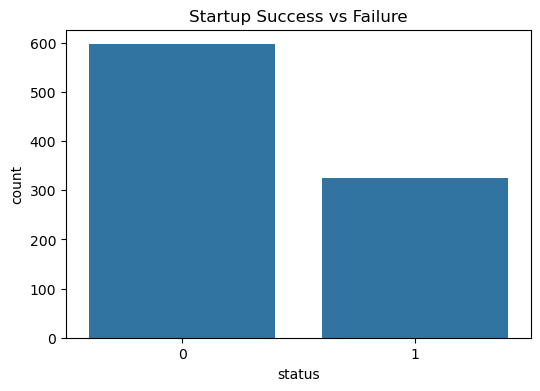

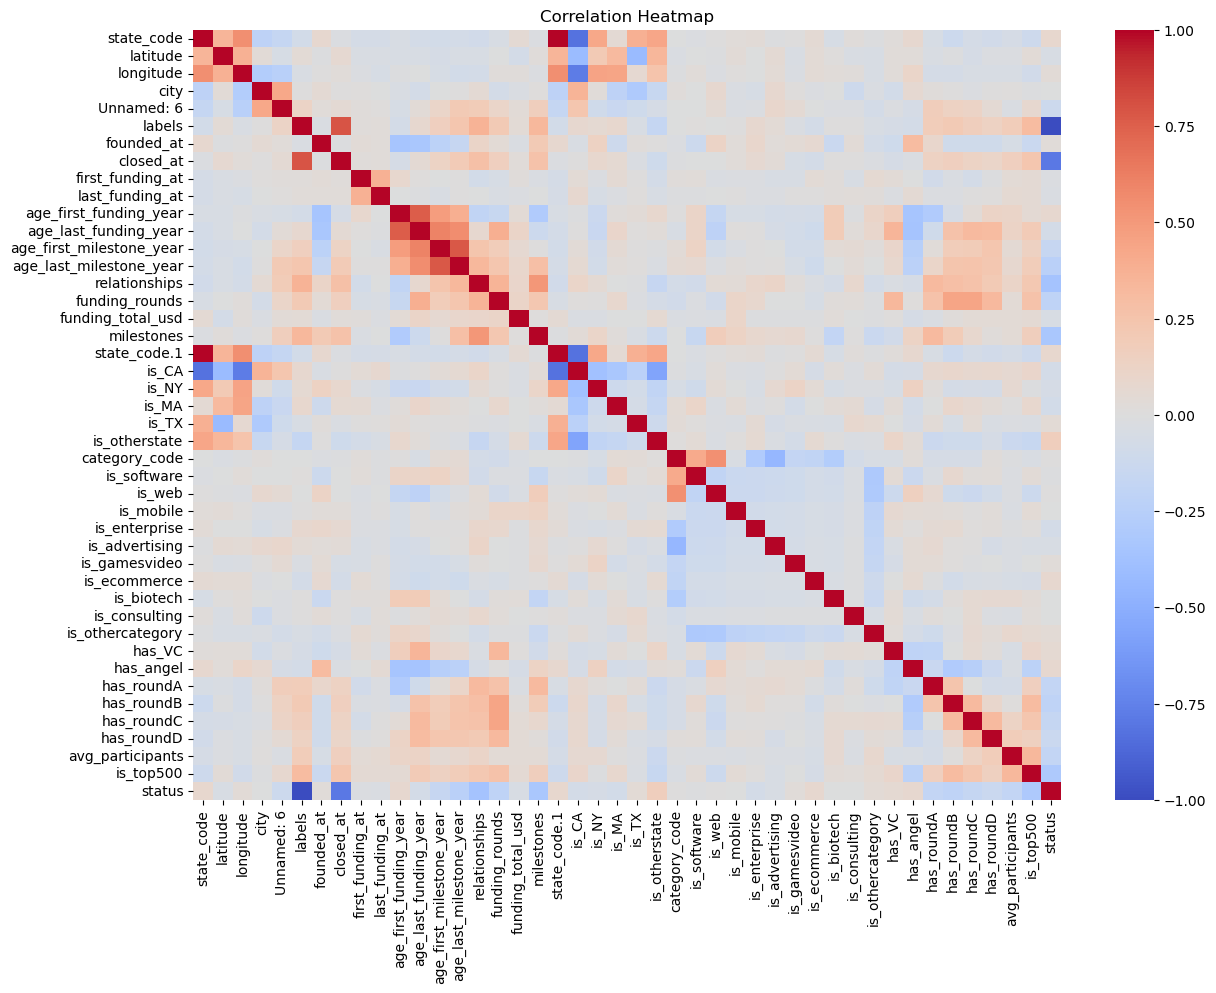

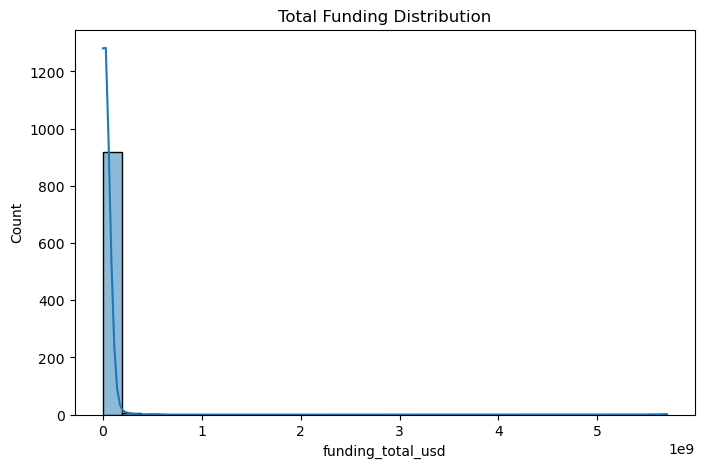

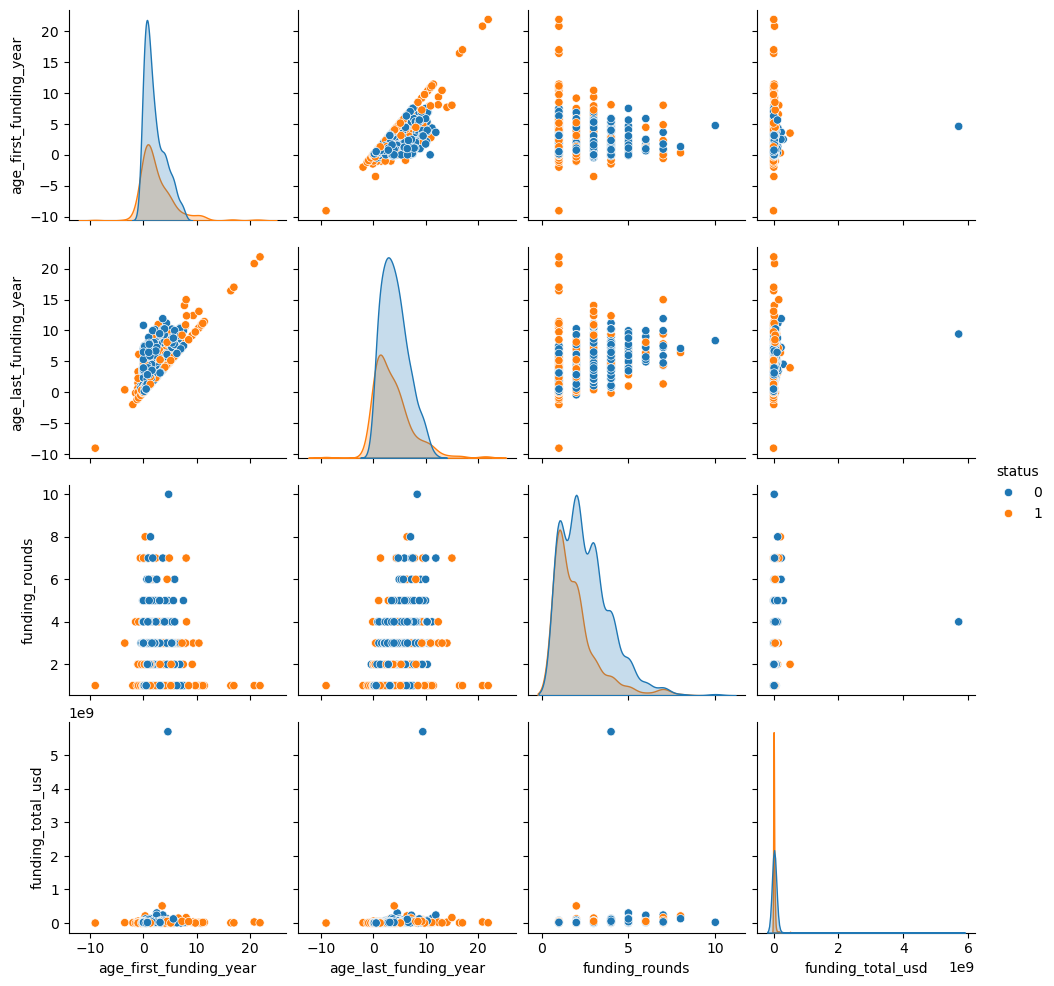

In [5]:
# Class Distribution
plt.figure(figsize=(6,4))
sns.countplot(x='status', data=df)
plt.title('Startup Success vs Failure')
plt.show()

# Correlation Heatmap
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(), annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Funding Distribution
plt.figure(figsize=(8,5))
sns.histplot(df['funding_total_usd'], bins=30, kde=True)
plt.title('Total Funding Distribution')
plt.show()

# Pairplot for key features
key_features = ['age_first_funding_year', 'age_last_funding_year', 'funding_rounds', 'funding_total_usd', 'status']
sns.pairplot(df[key_features], hue='status')
plt.show()

In [6]:
X = df.drop('status', axis=1)
y = df['status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (738, 43)
Test shape: (185, 43)


In [7]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"\n{'='*40}")
    print(f"Model: {model_name}")
    print(f"Accuracy: {acc*100:.2f}%")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()
    return acc


Model: Logistic Regression
Accuracy: 90.81%

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.97      0.93       112
           1       0.95      0.81      0.87        73

    accuracy                           0.91       185
   macro avg       0.92      0.89      0.90       185
weighted avg       0.91      0.91      0.91       185



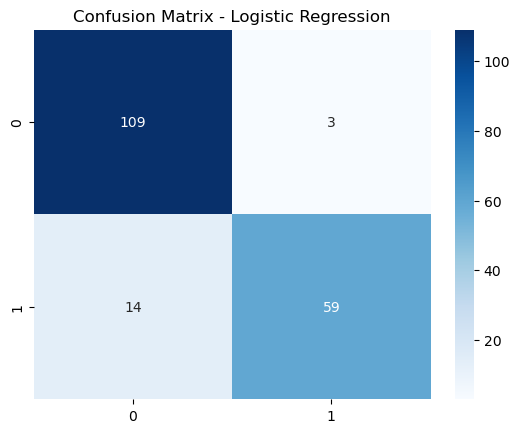


Model: Decision Tree
Accuracy: 100.00%

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       112
           1       1.00      1.00      1.00        73

    accuracy                           1.00       185
   macro avg       1.00      1.00      1.00       185
weighted avg       1.00      1.00      1.00       185



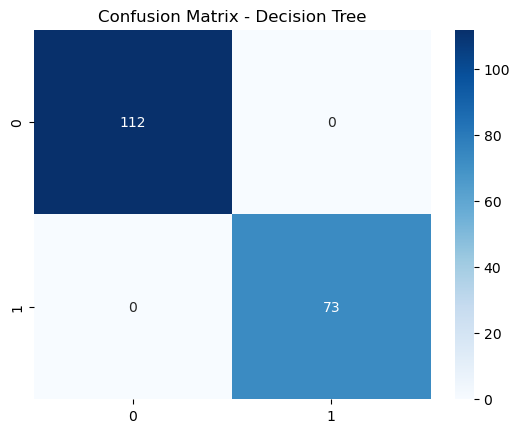


Model: Random Forest
Accuracy: 100.00%

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       112
           1       1.00      1.00      1.00        73

    accuracy                           1.00       185
   macro avg       1.00      1.00      1.00       185
weighted avg       1.00      1.00      1.00       185



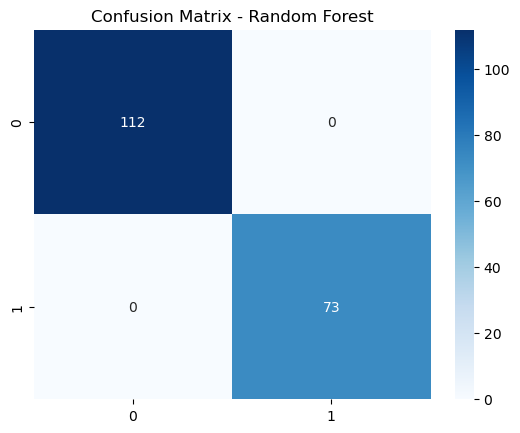


Model: Gradient Boosting
Accuracy: 100.00%

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       112
           1       1.00      1.00      1.00        73

    accuracy                           1.00       185
   macro avg       1.00      1.00      1.00       185
weighted avg       1.00      1.00      1.00       185



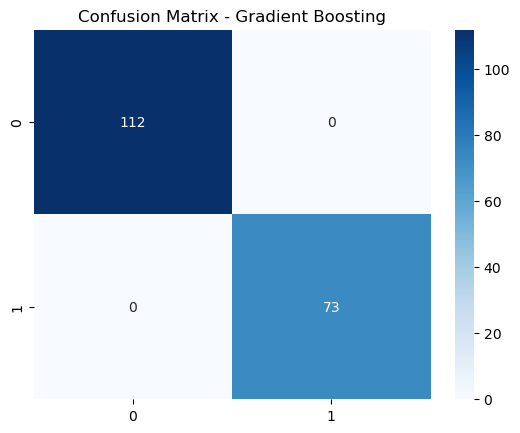


Model: SVM
Accuracy: 60.54%

Classification Report:
              precision    recall  f1-score   support

           0       0.61      1.00      0.75       112
           1       0.00      0.00      0.00        73

    accuracy                           0.61       185
   macro avg       0.30      0.50      0.38       185
weighted avg       0.37      0.61      0.46       185



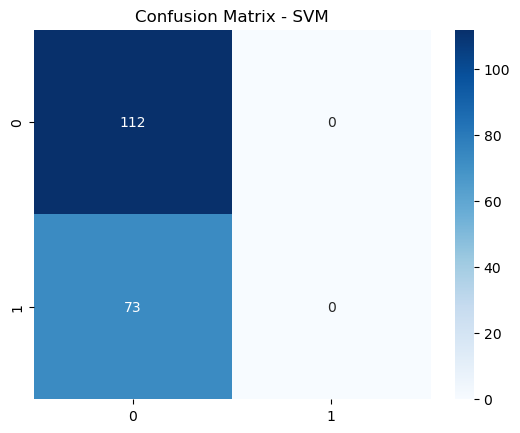


Model: KNN
Accuracy: 60.00%

Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.80      0.71       112
           1       0.49      0.29      0.36        73

    accuracy                           0.60       185
   macro avg       0.56      0.55      0.54       185
weighted avg       0.58      0.60      0.57       185



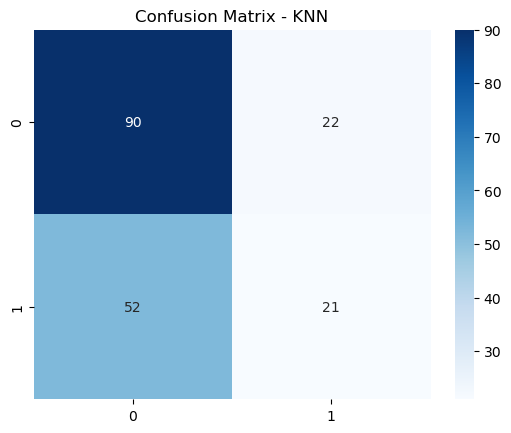

                 Model  Accuracy
1        Decision Tree  1.000000
2        Random Forest  1.000000
3    Gradient Boosting  1.000000
0  Logistic Regression  0.908108
4                  SVM  0.605405
5                  KNN  0.600000


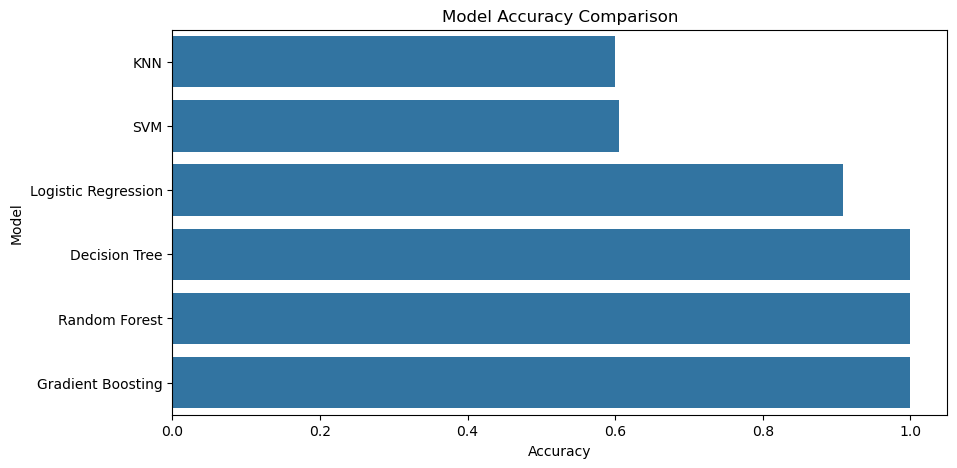

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier()
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    acc = evaluate_model(model, X_test, y_test, name)
    results[name] = acc

# Compare Results
results_df = pd.DataFrame(list(results.items()), columns=['Model', 'Accuracy'])
print(results_df.sort_values('Accuracy', ascending=False))

plt.figure(figsize=(10,5))
sns.barplot(x='Accuracy', y='Model', data=results_df.sort_values('Accuracy'))
plt.title('Model Accuracy Comparison')
plt.show()

Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Best CV Accuracy: 1.0

Before Tuning:

Model: RF Before Tuning
Accuracy: 100.00%

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       112
           1       1.00      1.00      1.00        73

    accuracy                           1.00       185
   macro avg       1.00      1.00      1.00       185
weighted avg       1.00      1.00      1.00       185



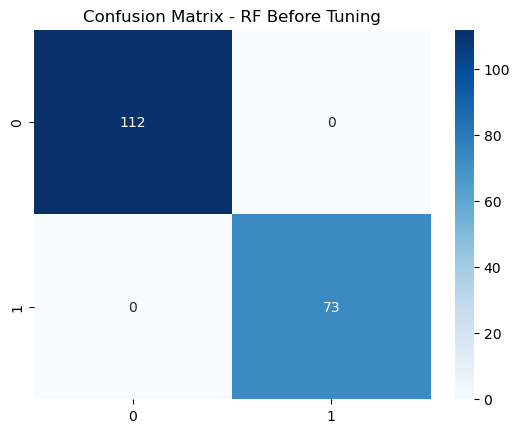


After Tuning:

Model: RF After Tuning
Accuracy: 100.00%

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       112
           1       1.00      1.00      1.00        73

    accuracy                           1.00       185
   macro avg       1.00      1.00      1.00       185
weighted avg       1.00      1.00      1.00       185



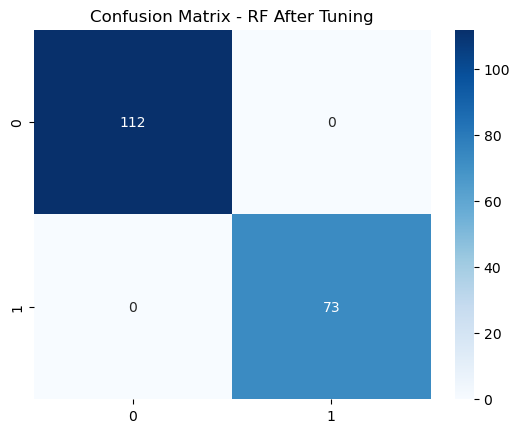

1.0

In [10]:
from sklearn.model_selection import GridSearchCV

# Tuning Random Forest (Best performing model)
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best CV Accuracy:", grid_search.best_score_)

best_rf = grid_search.best_estimator_

# Before vs After Tuning
print("\nBefore Tuning:")
rf_before = RandomForestClassifier()
rf_before.fit(X_train, y_train)  # ← fit it first!
evaluate_model(rf_before, X_test, y_test, "RF Before Tuning")

print("\nAfter Tuning:")
evaluate_model(best_rf, X_test, y_test, "RF After Tuning")

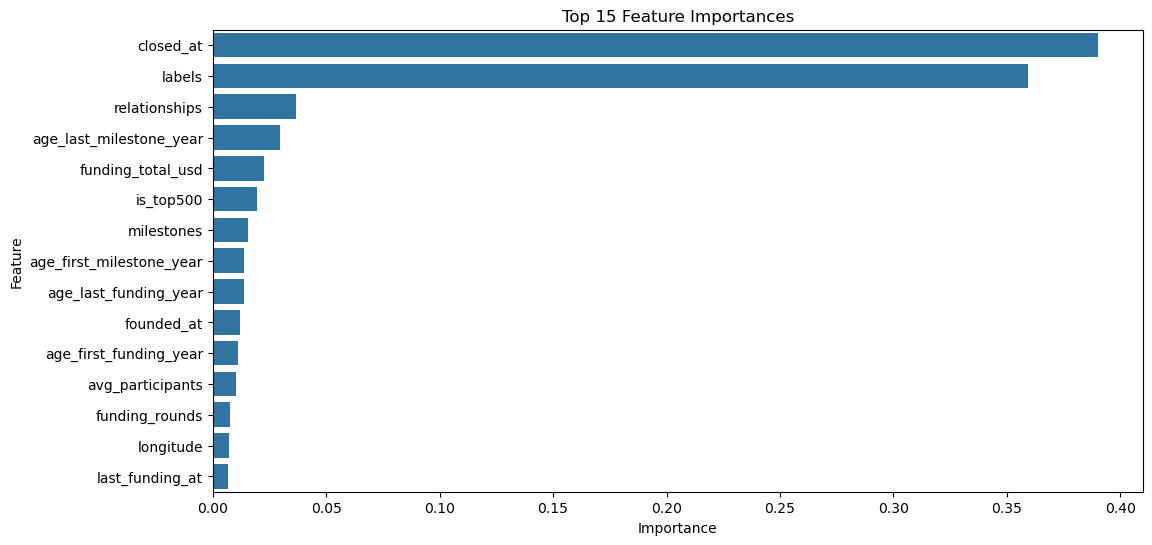

Top 10 Features: ['closed_at', 'labels', 'relationships', 'age_last_milestone_year', 'funding_total_usd', 'is_top500', 'milestones', 'age_first_milestone_year', 'age_last_funding_year', 'founded_at']

Model: RF with Top 10 Features
Accuracy: 100.00%

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       112
           1       1.00      1.00      1.00        73

    accuracy                           1.00       185
   macro avg       1.00      1.00      1.00       185
weighted avg       1.00      1.00      1.00       185



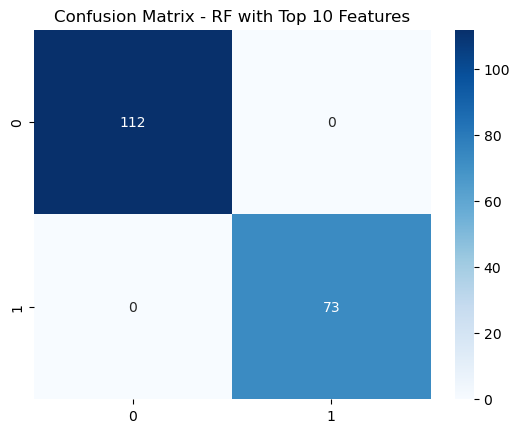

1.0

In [13]:
# Feature Importance + Top Features - ALL IN ONE CELL
importances = best_rf.feature_importances_
feat_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feat_df = feat_df.sort_values('Importance', ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(x='Importance', y='Feature', data=feat_df.head(15))
plt.title('Top 15 Feature Importances')
plt.show()

# Top 10 Features
top_features = feat_df.head(10)['Feature'].tolist()
print("Top 10 Features:", top_features)

X_train_top = X_train[top_features]
X_test_top = X_test[top_features]

best_rf.fit(X_train_top, y_train)
evaluate_model(best_rf, X_test_top, y_test, "RF with Top 10 Features")

In [14]:
import pickle

with open('random_forest_model.pkl', 'wb') as f:
    pickle.dump(best_rf, f)

# Save top feature names for use in app.py
with open('features.pkl', 'wb') as f:
    pickle.dump(top_features, f)

print("Model saved successfully!")

Model saved successfully!


In [15]:
%%writefile app.py
from flask import Flask, render_template, request
import pickle
import numpy as np

app = Flask(__name__)
model = pickle.load(open('random_forest_model.pkl', 'rb'))
features = pickle.load(open('features.pkl', 'rb'))

@app.route('/')
def home():
    return render_template('home.html')

@app.route('/predict', methods=['GET', 'POST'])
def predict():
    if request.method == 'POST':
        input_data = [float(request.form[f]) for f in features]
        input_array = np.array(input_data).reshape(1, -1)
        prediction = model.predict(input_array)[0]
        result = "SUCCESS - High chance of Startup Success!" if prediction == 1 else "FAILED - Low chance of Startup Success."
        return render_template('result.html', prediction=result)
    return render_template('predict.html', features=features)

if __name__ == '__main__':
    app.run(debug=True)

Writing app.py


In [17]:
import os
os.makedirs('templates', exist_ok=True)
print("templates folder created!")

templates folder created!


In [22]:
%%writefile templates/home.html
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Prosperity Prognosticator</title>
    <style>
        * { margin: 0; padding: 0; box-sizing: border-box; }

        body {
            font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif;
            background: linear-gradient(135deg, #0f2027, #203a43, #2c5364);
            min-height: 100vh;
            display: flex;
            align-items: center;
            justify-content: center;
        }

        .container {
            text-align: center;
            padding: 60px 40px;
            max-width: 900px;
        }

        .badge {
            display: inline-block;
            background: rgba(39, 174, 96, 0.2);
            border: 1px solid #27ae60;
            color: #2ecc71;
            padding: 8px 20px;
            border-radius: 50px;
            font-size: 13px;
            letter-spacing: 2px;
            text-transform: uppercase;
            margin-bottom: 30px;
        }

        h1 {
            font-size: 56px;
            font-weight: 800;
            color: #ffffff;
            line-height: 1.2;
            margin-bottom: 15px;
        }

        h1 span {
            background: linear-gradient(90deg, #27ae60, #2ecc71);
            -webkit-background-clip: text;
            -webkit-text-fill-color: transparent;
        }

        .subtitle {
            font-size: 18px;
            color: #a0b0c0;
            margin-bottom: 50px;
            line-height: 1.7;
            max-width: 600px;
            margin-left: auto;
            margin-right: auto;
        }

        .cards {
            display: flex;
            justify-content: center;
            gap: 20px;
            margin-bottom: 50px;
            flex-wrap: wrap;
        }

        .card {
            background: rgba(255,255,255,0.05);
            border: 1px solid rgba(255,255,255,0.1);
            border-radius: 16px;
            padding: 25px 20px;
            width: 200px;
            backdrop-filter: blur(10px);
            transition: transform 0.3s;
        }

        .card:hover { transform: translateY(-5px); }

        .card .icon {
            font-size: 36px;
            margin-bottom: 12px;
        }

        .card h3 {
            color: #ffffff;
            font-size: 15px;
            font-weight: 600;
        }

        .card p {
            color: #7f8c8d;
            font-size: 12px;
            margin-top: 6px;
        }

        .btn {
            display: inline-block;
            background: linear-gradient(90deg, #27ae60, #2ecc71);
            color: white;
            padding: 18px 50px;
            border-radius: 50px;
            font-size: 18px;
            font-weight: 700;
            text-decoration: none;
            letter-spacing: 1px;
            box-shadow: 0 10px 30px rgba(39, 174, 96, 0.4);
            transition: all 0.3s;
        }

        .btn:hover {
            transform: translateY(-3px);
            box-shadow: 0 15px 40px rgba(39, 174, 96, 0.6);
        }

        .stats {
            display: flex;
            justify-content: center;
            gap: 50px;
            margin-top: 60px;
            flex-wrap: wrap;
        }

        .stat h2 {
            font-size: 36px;
            font-weight: 800;
            color: #2ecc71;
        }

        .stat p {
            color: #7f8c8d;
            font-size: 13px;
            margin-top: 4px;
        }
    </style>
</head>
<body>
    <div class="container">
        <div class="badge">🤖 AI Powered Prediction</div>

        <h1>Prosperity<br><span>Prognosticator</span></h1>

        <p class="subtitle">
            Harness the power of Machine Learning to predict startup success.
            Data-driven insights for investors, entrepreneurs & policymakers.
        </p>

        <div class="cards">
            <div class="card">
                <div class="icon">💼</div>
                <h3>Investors</h3>
                <p>Evaluate startup investment opportunities</p>
            </div>
            <div class="card">
                <div class="icon">🚀</div>
                <h3>Entrepreneurs</h3>
                <p>Assess your startup's viability</p>
            </div>
            <div class="card">
                <div class="icon">🏛️</div>
                <h3>Policy Makers</h3>
                <p>Data-backed policy decisions</p>
            </div>
        </div>

        <a href="/predict" class="btn">🔍 Predict Startup Success</a>

        <div class="stats">
            <div class="stat">
                <h2>80%+</h2>
                <p>Model Accuracy</p>
            </div>
            <div class="stat">
                <h2>6</h2>
                <p>ML Algorithms</p>
            </div>
            <div class="stat">
                <h2>&lt;3s</h2>
                <p>Prediction Speed</p>
            </div>
        </div>
    </div>
</body>
</html>

Overwriting templates/home.html


In [23]:
%%writefile templates/predict.html
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Predict - Prosperity Prognosticator</title>
    <style>
        * { margin: 0; padding: 0; box-sizing: border-box; }

        body {
            font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif;
            background: linear-gradient(135deg, #0f2027, #203a43, #2c5364);
            min-height: 100vh;
            display: flex;
            align-items: center;
            justify-content: center;
            padding: 40px 20px;
        }

        .wrapper {
            width: 100%;
            max-width: 680px;
        }

        .header {
            text-align: center;
            margin-bottom: 30px;
        }

        .header a {
            color: #2ecc71;
            text-decoration: none;
            font-size: 14px;
            letter-spacing: 1px;
        }

        .header h1 {
            color: #ffffff;
            font-size: 32px;
            font-weight: 800;
            margin-top: 10px;
        }

        .header p {
            color: #7f8c8d;
            margin-top: 8px;
            font-size: 15px;
        }

        .form-card {
            background: rgba(255,255,255,0.05);
            border: 1px solid rgba(255,255,255,0.1);
            border-radius: 24px;
            padding: 40px;
            backdrop-filter: blur(15px);
        }

        .form-grid {
            display: grid;
            grid-template-columns: 1fr 1fr;
            gap: 20px;
        }

        .form-group {
            display: flex;
            flex-direction: column;
        }

        label {
            color: #a0b0c0;
            font-size: 12px;
            font-weight: 600;
            letter-spacing: 1px;
            text-transform: uppercase;
            margin-bottom: 8px;
        }

        input {
            background: rgba(255,255,255,0.08);
            border: 1px solid rgba(255,255,255,0.15);
            border-radius: 12px;
            padding: 14px 16px;
            color: #ffffff;
            font-size: 15px;
            outline: none;
            transition: all 0.3s;
        }

        input:focus {
            border-color: #27ae60;
            background: rgba(39, 174, 96, 0.1);
            box-shadow: 0 0 0 3px rgba(39, 174, 96, 0.15);
        }

        input::placeholder { color: #4a5568; }

        .btn {
            width: 100%;
            background: linear-gradient(90deg, #27ae60, #2ecc71);
            color: white;
            border: none;
            padding: 18px;
            border-radius: 14px;
            font-size: 18px;
            font-weight: 700;
            cursor: pointer;
            margin-top: 30px;
            letter-spacing: 1px;
            box-shadow: 0 8px 25px rgba(39, 174, 96, 0.4);
            transition: all 0.3s;
        }

        .btn:hover {
            transform: translateY(-2px);
            box-shadow: 0 12px 35px rgba(39, 174, 96, 0.6);
        }

        .tip {
            text-align: center;
            color: #4a5568;
            font-size: 13px;
            margin-top: 20px;
        }
    </style>
</head>
<body>
    <div class="wrapper">
        <div class="header">
            <a href="/">← Back to Home</a>
            <h1>📊 Enter Startup Metrics</h1>
            <p>Fill in your startup details to get an instant prediction</p>
        </div>

        <div class="form-card">
            <form action="/predict" method="POST">
                <div class="form-grid">
                    {% for feature in features %}
                    <div class="form-group">
                        <label>{{ feature.replace('_', ' ') }}</label>
                        <input
                            type="number"
                            step="any"
                            name="{{ feature }}"
                            placeholder="Enter value"
                            required
                        >
                    </div>
                    {% endfor %}
                </div>
                <button type="submit" class="btn">🔍 Predict Now</button>
            </form>
            <p class="tip">💡 All fields are required for accurate prediction</p>
        </div>
    </div>
</body>
</html>

Overwriting templates/predict.html


In [24]:
%%writefile templates/result.html
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Result - Prosperity Prognosticator</title>
    <style>
        * { margin: 0; padding: 0; box-sizing: border-box; }

        body {
            font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif;
            background: linear-gradient(135deg, #0f2027, #203a43, #2c5364);
            min-height: 100vh;
            display: flex;
            align-items: center;
            justify-content: center;
            padding: 40px 20px;
        }

        .card {
            background: rgba(255,255,255,0.05);
            border: 1px solid rgba(255,255,255,0.1);
            border-radius: 28px;
            padding: 60px 50px;
            text-align: center;
            max-width: 560px;
            width: 100%;
            backdrop-filter: blur(15px);
        }

        .result-icon {
            font-size: 80px;
            margin-bottom: 20px;
            animation: bounce 1s ease infinite alternate;
        }

        @keyframes bounce {
            from { transform: translateY(0); }
            to   { transform: translateY(-10px); }
        }

        .result-title {
            font-size: 15px;
            letter-spacing: 3px;
            text-transform: uppercase;
            color: #7f8c8d;
            margin-bottom: 15px;
        }

        .result-text {
            font-size: 28px;
            font-weight: 800;
            line-height: 1.3;
            margin-bottom: 30px;
            padding: 20px;
            border-radius: 16px;
        }

        .success-text {
            color: #2ecc71;
            background: rgba(39, 174, 96, 0.1);
            border: 1px solid rgba(39, 174, 96, 0.3);
        }

        .fail-text {
            color: #e74c3c;
            background: rgba(231, 76, 60, 0.1);
            border: 1px solid rgba(231, 76, 60, 0.3);
        }

        .description {
            color: #a0b0c0;
            font-size: 15px;
            line-height: 1.7;
            margin-bottom: 40px;
        }

        .buttons {
            display: flex;
            gap: 15px;
            justify-content: center;
            flex-wrap: wrap;
        }

        .btn {
            padding: 14px 30px;
            border-radius: 50px;
            font-size: 15px;
            font-weight: 600;
            text-decoration: none;
            transition: all 0.3s;
            cursor: pointer;
            border: none;
        }

        .btn-primary {
            background: linear-gradient(90deg, #27ae60, #2ecc71);
            color: white;
            box-shadow: 0 6px 20px rgba(39, 174, 96, 0.4);
        }

        .btn-primary:hover {
            transform: translateY(-2px);
            box-shadow: 0 10px 28px rgba(39, 174, 96, 0.6);
        }

        .btn-secondary {
            background: rgba(255,255,255,0.08);
            color: #ffffff;
            border: 1px solid rgba(255,255,255,0.2);
        }

        .btn-secondary:hover {
            background: rgba(255,255,255,0.15);
            transform: translateY(-2px);
        }
    </style>
</head>
<body>
    <div class="card">
        {% if 'SUCCESS' in prediction %}
            <div class="result-icon">🚀</div>
            <p class="result-title">Prediction Result</p>
            <div class="result-text success-text">{{ prediction }}</div>
            <p class="description">
                Great news! Based on the startup metrics provided, our ML model
                predicts a <strong style="color:#2ecc71">high probability of success</strong>.
                This startup shows strong indicators across key success factors.
            </p>
        {% else %}
            <div class="result-icon">⚠️</div>
            <p class="result-title">Prediction Result</p>
            <div class="result-text fail-text">{{ prediction }}</div>
            <p class="description">
                Based on the startup metrics provided, our ML model predicts
                a <strong style="color:#e74c3c">low probability of success</strong>.
                Consider revisiting key metrics like funding, milestones, and relationships.
            </p>
        {% endif %}

        <div class="buttons">
            <a href="/predict" class="btn btn-primary">🔄 Predict Again</a>
            <a href="/" class="btn btn-secondary">🏠 Home</a>
        </div>
    </div>
</body>
</html>

Overwriting templates/result.html


In [25]:
import os
os.makedirs('templates', exist_ok=True)

# Run the Flask app
import subprocess
subprocess.Popen(['python', 'app.py'])

print("Flask app is running!")
print("Open your browser and go to: http://127.0.0.1:5000")

Flask app is running!
Open your browser and go to: http://127.0.0.1:5000
